<a href="https://colab.research.google.com/github/difaahh/Machine-Learning/blob/main/clustering_country_data_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.Inport Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import math

# 02.Dataset Preparation

In [2]:
def load_and_clean_csv(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    headers = lines[0].strip().split(',')
    data = []

    for idx, line in enumerate(lines[1:], start=2):
        line = line.strip()
        if not line:
            continue  # lewati baris kosong

        row = line.split(',')
        if len(row) != len(headers):
            print(f"[!] Baris {idx} dilewati (kolom tidak cocok): {row}")
            continue
        try:
            # Pastikan semua kolom numerik valid
            _ = [float(x) for x in row[1:]]
            data.append(row)
        except ValueError as e:
            print(f"[!] Baris {idx} error: {e}")
            continue

    return headers, data

In [3]:
data = pd.read_csv ('https://raw.githubusercontent.com/difaahh/Machine-Learning/refs/heads/main/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# 03.Preprocessing

In [5]:
data.describe(include = 'all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


## Check Column Data Types

In [6]:
data.shape

(167, 10)

In [7]:
data.dtypes

,0
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


## Check Missing Values

In [8]:
data.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [9]:
data.duplicated().sum()

np.int64(0)

## Check Noises

In [10]:
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.7})

In [11]:
columns_for_clustering = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

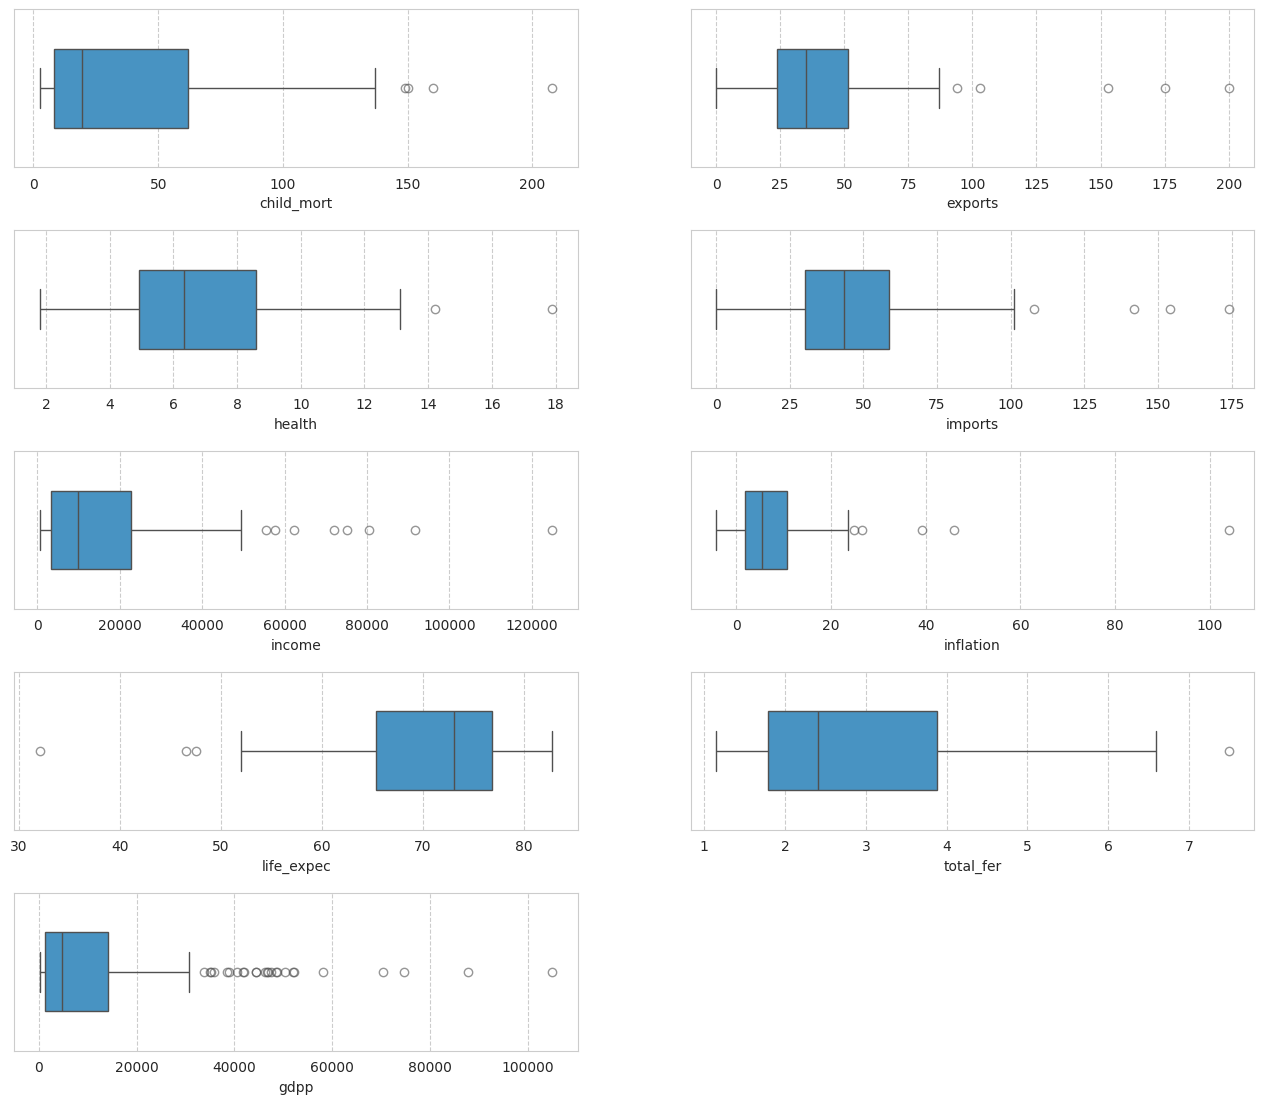

In [12]:
plt.figure(figsize = (16,25))

for i in range(1,10):

    plt.subplot(9,2,i)
    sns.boxplot(x = columns_for_clustering[i-1],
                data = data,
                width = 0.5,
                color = '#3498D6',
                flierprops = {'alpha': 0.6})

plt.subplots_adjust(hspace = 0.4)
plt.show()

Scatter Plot

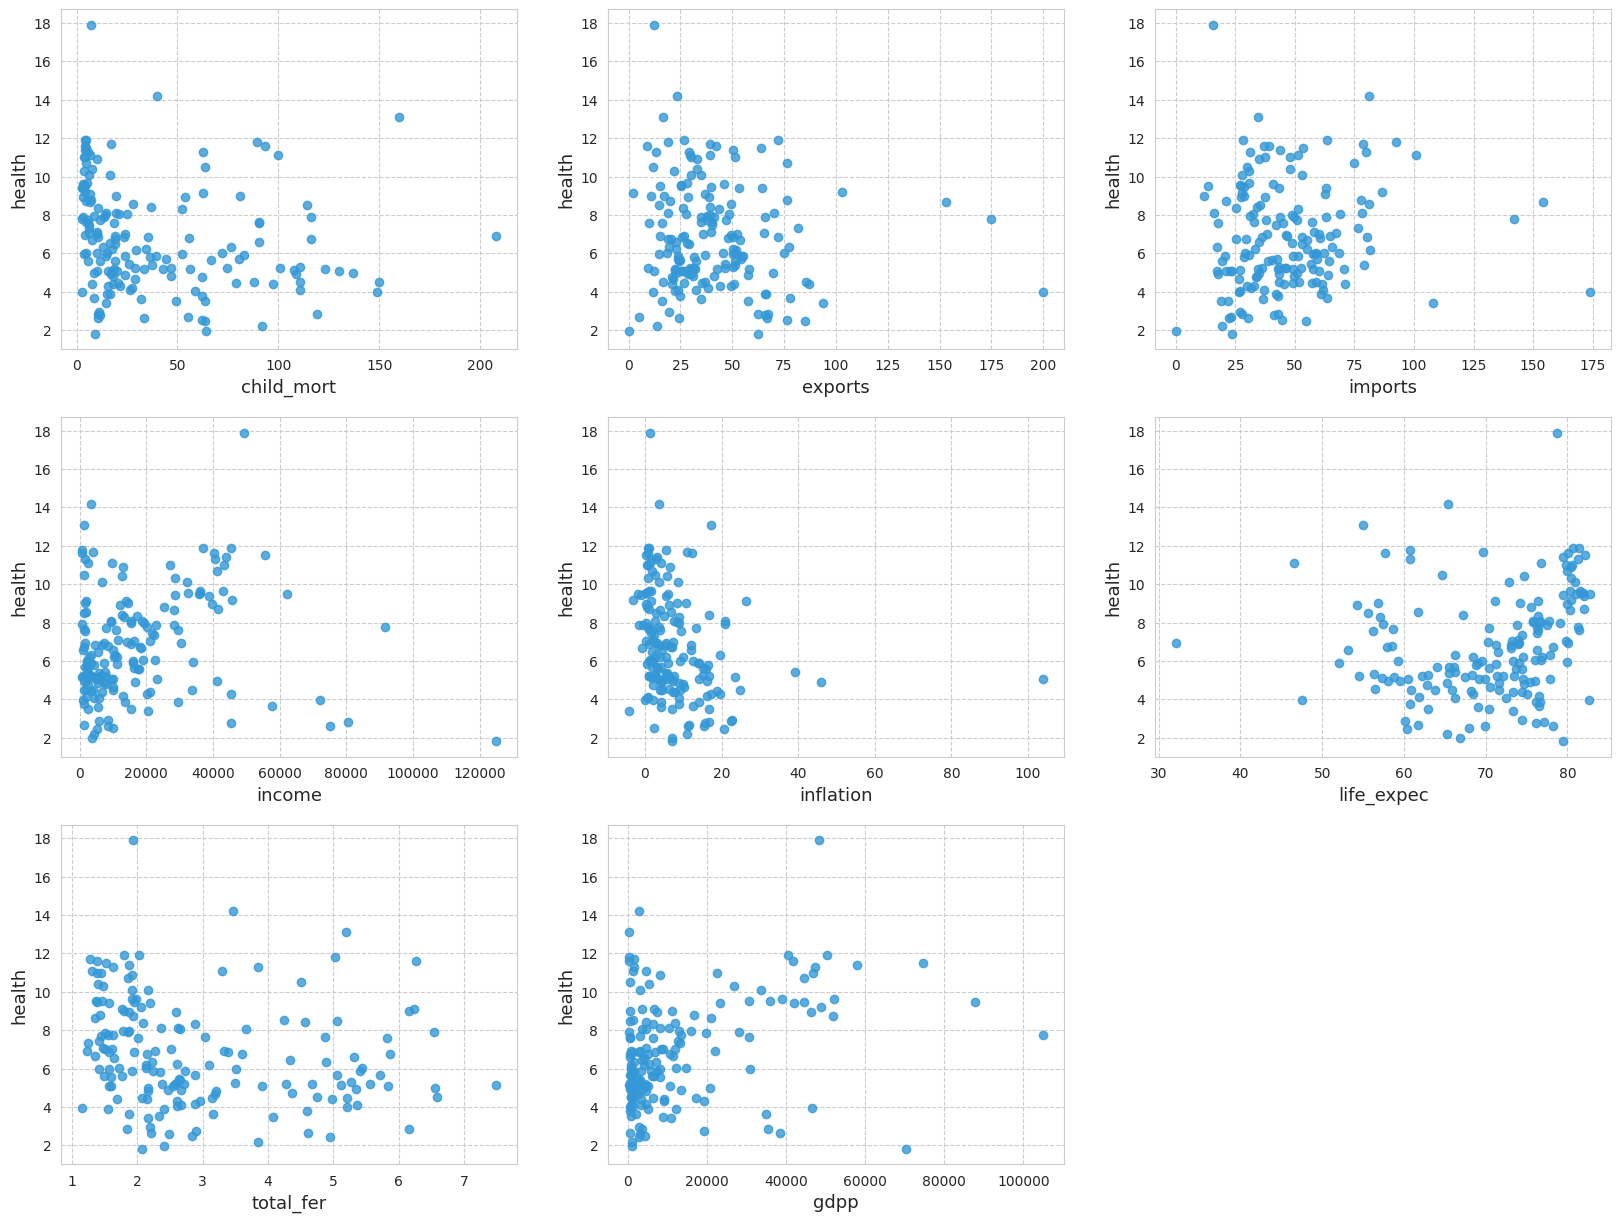

In [13]:
features = columns_for_clustering.copy()
features.remove('health')
y = 'health'

plt.figure(figsize = (20,15))

for i in range(1, 9):
    plt.subplot(3,3,i)
    plt.scatter(data[features[i-1]], data[y], alpha = 0.8, color = '#3498D6')
    plt.xlabel(features[i-1], fontsize = 13)
    plt.ylabel(y, fontsize = 13)

plt.show()

KDE Plot

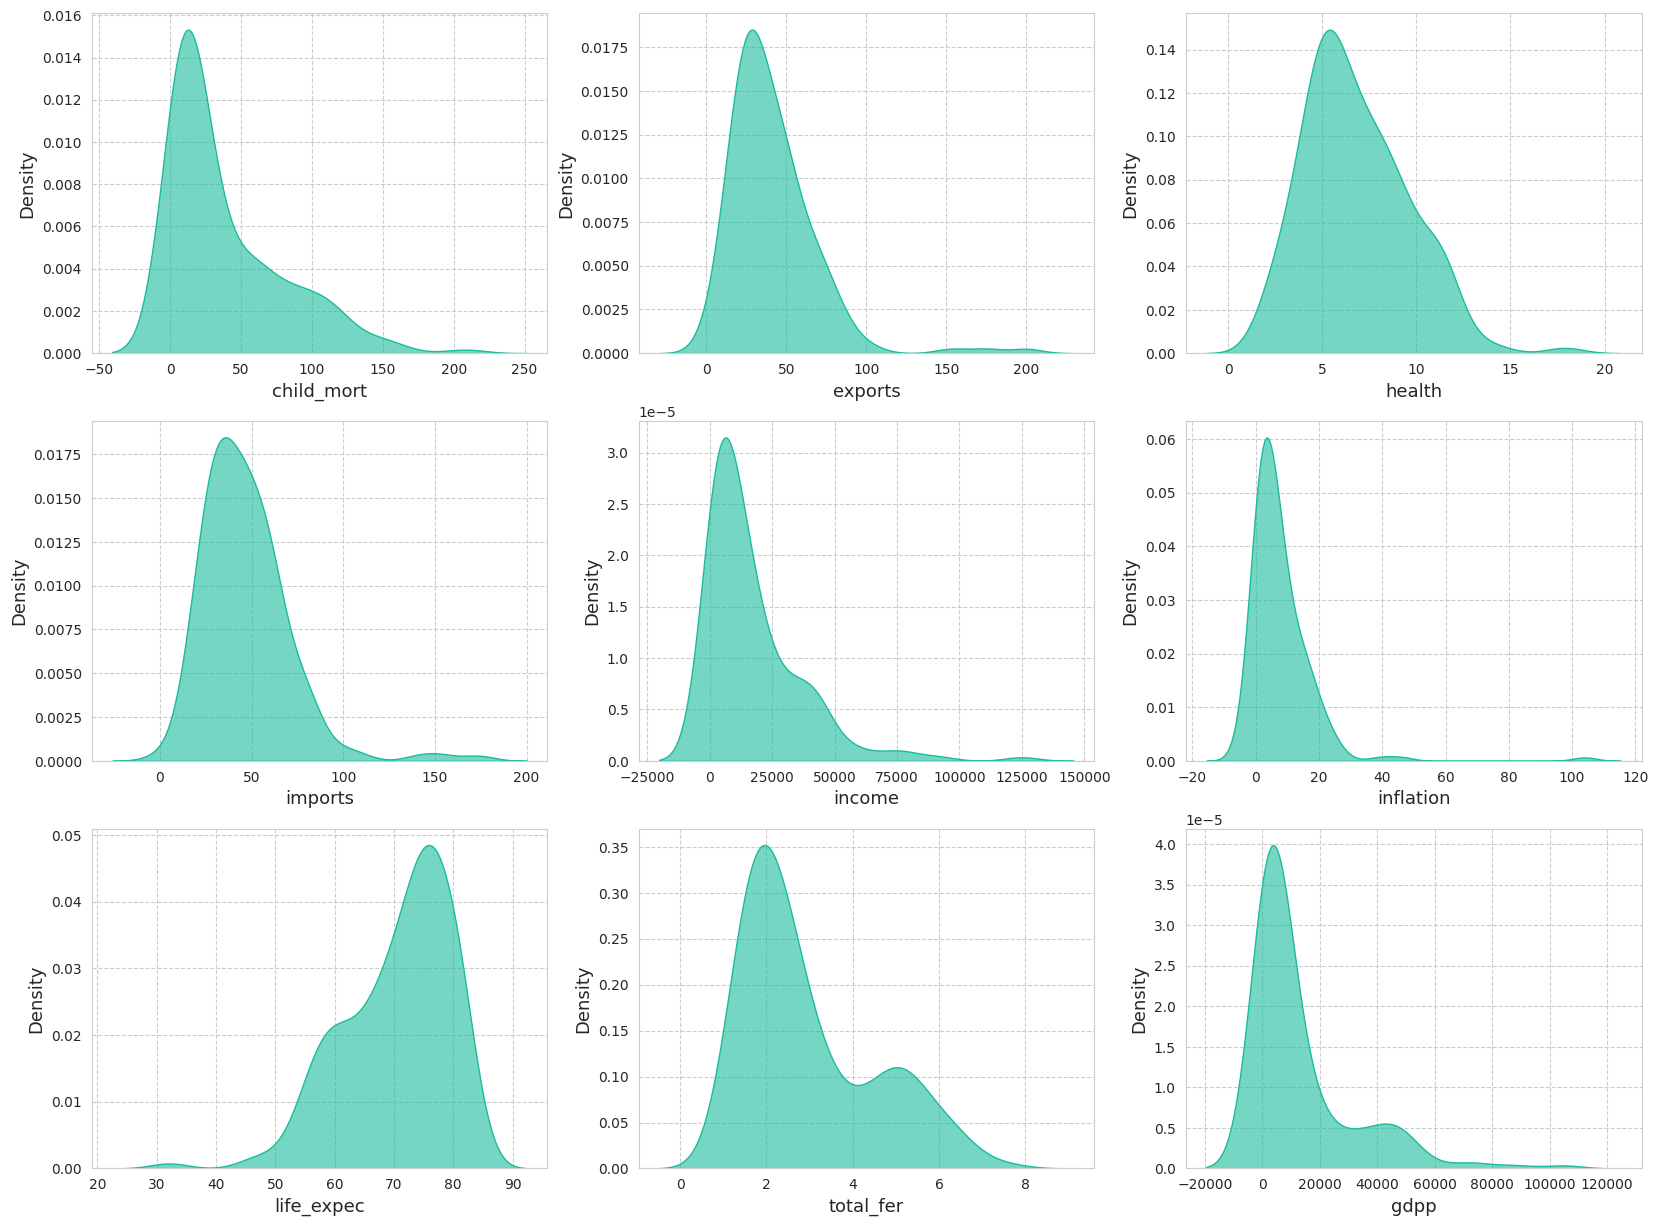

In [14]:
plt.figure(figsize = (20,15))

for i in range(1, 10):
    plt.subplot(3,3,i)
    sns.kdeplot(data[columns_for_clustering[i-1]], fill = True, color = '#1ABC9C', alpha = 0.6)
    plt.xlabel(columns_for_clustering[i-1], fontsize = 13)
    plt.ylabel("Density", fontsize = 13)

plt.show()

## Normalisasi Data

Tujuan:
*   Menghapus kolom non-numerik (country)
*   Melakukan normalisasi Min-Max secara manual

Rumus Min-Max Normalisasi:
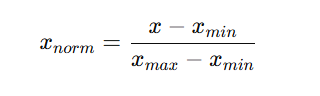



In [15]:
negara = data['country'].tolist()
angka = data.drop(columns='country')

In [16]:
# Fungsi normalisasi Min-Max manual
def normalisasi(data):
    hasil = []
    for kolom in data.columns:
        mini = data[kolom].min()
        maksi = data[kolom].max()
        norm = [(x - mini) / (maksi - mini) if maksi != mini else 0 for x in data[kolom]]
        hasil.append(norm)
    return pd.DataFrame(list(zip(*hasil)), columns=data.columns)

In [17]:
# Normalisasi data angka
angka_norm = normalisasi(angka)

In [27]:
# 5. Gabungkan Kembali dengan Kolom Negara
normalisasi_df = pd.concat([pd.DataFrame({'country': negara}), angka_norm], axis=1)


In [28]:
normalisasi_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [29]:
from scipy.stats import shapiro

print("Hasil Uji Normalitas (Shapiro-Wilk) pada Setiap Kolom Numerik:\n")

for kolom in angka.columns:
    stat, p = shapiro(normalisasi_df[kolom])
    print(f"{kolom:15} -> Statistik = {stat:.4f}, p-value = {p:.4f}", end="  ")
    if p > 0.05:
        print("✅ Mungkin normal")
    else:
        print("❌ Tidak normal")


Hasil Uji Normalitas (Shapiro-Wilk) pada Setiap Kolom Numerik:

child_mort      -> Statistik = 0.8119, p-value = 0.0000  ❌ Tidak normal
exports         -> Statistik = 0.8138, p-value = 0.0000  ❌ Tidak normal
health          -> Statistik = 0.9641, p-value = 0.0003  ❌ Tidak normal
imports         -> Statistik = 0.8688, p-value = 0.0000  ❌ Tidak normal
income          -> Statistik = 0.7713, p-value = 0.0000  ❌ Tidak normal
inflation       -> Statistik = 0.6163, p-value = 0.0000  ❌ Tidak normal
life_expec      -> Statistik = 0.9264, p-value = 0.0000  ❌ Tidak normal
total_fer       -> Statistik = 0.8722, p-value = 0.0000  ❌ Tidak normal
gdpp            -> Statistik = 0.6965, p-value = 0.0000  ❌ Tidak normal


In [30]:
normalisasi_df.describe(include = 'all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,NaN,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,NaN,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,NaN,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900


#  Tahapan K-Means Manual:

Persiapan Data

In [31]:
data_array = angka_norm.astype(float).values.tolist()


In [32]:
normalisasi_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## Inisialisasi Centroid Awal Secara Manual

Kita akan memilih k titik data secara acak sebagai centroid awal. Misalnya kita mulai dengan k = 3 (jumlah cluster).

In [33]:
# Tetapkan jumlah cluster
k = 3

# Ambil acak k titik sebagai centroid awal
centroid_awal = random.sample(data_array, k)

# Tampilkan hasil centroid awal
for i, c in enumerate(centroid_awal):
    print(f"Centroid {i+1}: {c}")

Centroid 1: [0.08812074001947419, 0.13402804528468015, 0.16532007458048475, 0.32790637373579995, 0.07485268226800974, 0.07993715922742815, 0.7790927021696251, 0.1451104100946372, 0.05725930380169707]
Centroid 2: [0.12901655306718599, 0.10601277696344508, 0.1771286513362337, 0.15255260469338677, 0.0743703322587647, 0.13224286110341002, 0.757396449704142, 0.3217665615141956, 0.022611650392768853]
Centroid 3: [0.14264849074975655, 0.17354958452356534, 0.11187072715972653, 0.21004564372368617, 0.04012348160236673, 0.07790407540892709, 0.727810650887574, 0.31703470031545744, 0.018125590585001287]


## Menghitung Jarak Euclidean & Menentukan Cluster Tiap Data



Jarak Euclidean mengukur "seberapa jauh" dua data.

Rumus:
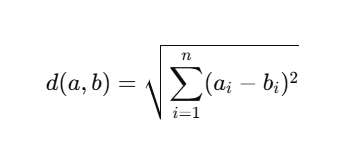

In [34]:
# Fungsi untuk menghitung jarak Euclidean antara dua titik
def euclidean(a, b):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(a, b)))

# Menentukan cluster untuk setiap data berdasarkan centroid terdekat
def assign_cluster(data, centroids):
    hasil = []
    for titik in data:
        jarak = [euclidean(titik, c) for c in centroids]
        cluster_terdekat = jarak.index(min(jarak))
        hasil.append(cluster_terdekat)
    return hasil

# Awal assign
cluster_awal = assign_cluster(data_array, centroid_awal)